In this project a local school district was interested in better understanding the data they had about chronic absences amoung students in special education. Analysis and graphs were completed for the items the school district was interested in knowing more about.  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Chronic_Absence.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Local Student ID                        384 non-null    int64 
 1   Current Grade Level                     384 non-null    object
 2   EL?                                     173 non-null    object
 3   Gender                                  384 non-null    object
 4   Reported Race                           378 non-null    object
 5   21-22 Chronic Abs students Days absent  384 non-null    int64 
 6   McK-V?                                  38 non-null     object
dtypes: int64(2), object(5)
memory usage: 21.1+ KB


Countplot of Chronic Absences by Grade Level

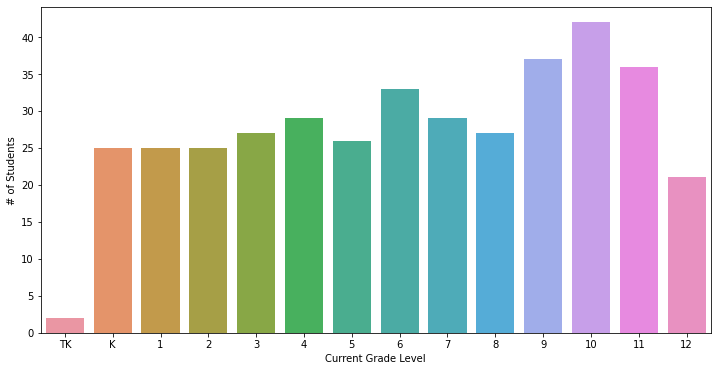

In [4]:
#Count plot of grades with chronic absences
plt.figure(figsize = (12,6)) 
c = sns.countplot(data=df, x="Current Grade Level", 
                  order = ["TK","K","1","2","3","4","5","6","7","8","9","10",
                                                      "11","12"]) 
c.set_ylabel("# of Students")
plt.savefig('b.pdf', dpi=200)

Average number of chronic absenses by grade level 

In [5]:
#finds average chronic absence for each grade level and sort highest to lowest
df_average_absence = df["21-22 Chronic Abs students Days absent"].groupby(by=df["Current Grade Level"]).mean().sort_values(ascending=False)
df_average_absence = pd.DataFrame(df_average_absence).reset_index() #converts to df and resets index
#Renames column names
df_average_absence.rename(columns={"21-22 Chronic Abs students Days absent":"Avg. Absences Per Grade Level"},inplace = True)
df_average_absence #Average Absences Per Grade Level in Descending order

,Current Grade Level,Avg. Absences Per Grade Level
0,11,16.416667
1,9,16.189189
2,10,15.404762
3,7,15.344828
4,TK,15.000000
5,12,14.714286
6,1,14.320000
7,4,14.068966
8,K,13.960000
9,5,13.923077


Histrogram of Chronic Absences 

<AxesSubplot:xlabel='Absences', ylabel='Count'>

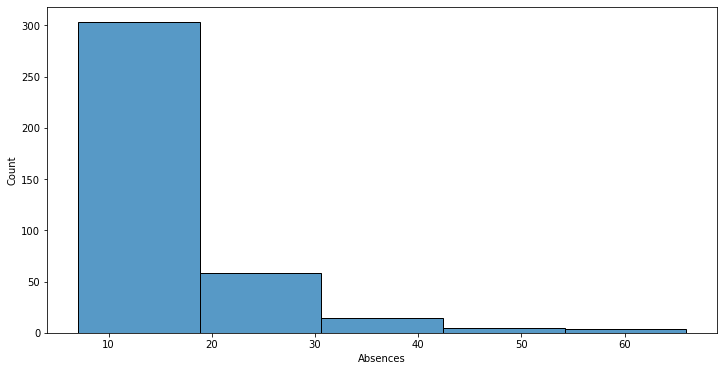

In [6]:
#Graph provides total chronic abences categories
df.rename(columns={"21-22 Chronic Abs students Days absent":'Absences'}, inplace = True)
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="Absences", bins=5, multiple='stack')
#plt.savefig("h.pdf", dpi=200)

Chronic Absences by Race 

In [7]:
#Use function to create uniformity in race values
def race(x):
    if x == "Native Hawaiian or Other Pacific Islander":
        return "Pacific Islander"
    if x == "Black or African American":
        return "Black"
    if x == "American Indian or Alaska Native":
        return "Native American"
    else:
        if x == x:
            return x

df["Reported Race"] = df["Reported Race"].apply(race)

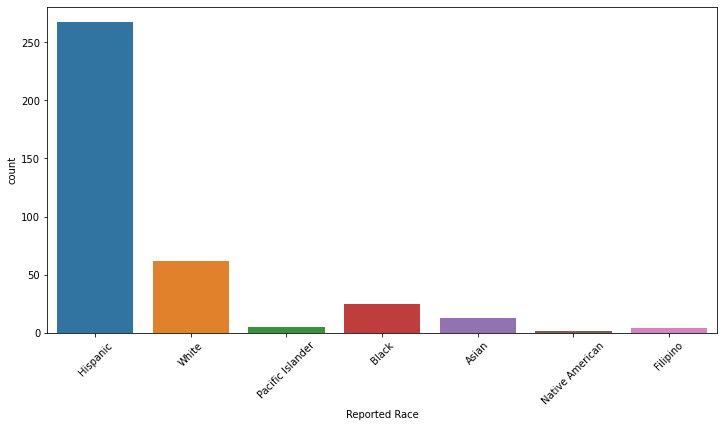

In [9]:
#Count plot of chronic absences by race 
plt.figure(figsize=(12,6))
plt.xticks(rotation=45)
sns.countplot(x=df["Reported Race"])
plt.savefig("a.pdf", dpi=200)

Chronic Absences by Gender 

In [10]:
gender = df["Gender"].groupby(by=df["Gender"]).count()
gender = pd.DataFrame(gender)
gender.drop(index="N", inplace = True)
gender.rename(columns={"Gender":"# Studnets"}, inplace = True)
gender

,# Studnets
Gender,
F,118
M,265


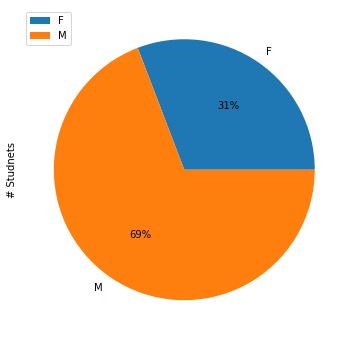

In [11]:
#Pie chart or chronic absenses by gender
gender.plot.pie(subplots=True, figsize=(11, 6), autopct='%1.0f%%')
plt.savefig('p.pdf', dpi =200)